# Aula 04 - Estatística

# Exercício 01:


Utilizando os dados de acidentes fatais em companhias aéreas dos Estados Unidos de 1985 a 1999, calcule algumas estatísticas básicas. Você deve retornar uma __lista__ com os valores das estatísticas calculadas, sendo elas, nessa ordem: menor valor, maior valor, média, mediana, dispersão, variância, desvio-padrão e intervalo-interquartil. Para responder à questão, crie uma função _estat(acidentes)_ que retorna a lista com os valores correspondentes às resposta da questão, inteiros quando forem inteiros ou com uma precisão de 4 casas decimais caso contrário.

__Teste:__
`assert_equal(estat(acidentes), ans)`, sendo que `ans` é uma lista contendo os valores corretos para as estatísticas que este exercício pede.

__Dicas:__  
1) A função round(var, n) retorna o valor da variável var com uma precisão de n casas decimais.

2) Execute o teste `assert_equal(estat(lista_boba), ans_bobo)` para alguma `lista_boba` que você saiba calcular as estatísticas no papel.


__Fonte:__ https://aviation-safety.net/

In [1]:
# Crie aqui a função estat(acidentes) - com esse nome e parâmetro - 
# a função deve retornar a lista com as respostas com precisão de 4 casas decimais!

acidentes = [0,14,0,1,0,4,1,0,0,2,1,5,0,3,0,0,6,1,1,12,3,1,5,0,3,0,0,1,1,0,1,5,2,1,1,3,4,0,3,0,2,2,1,0,1,1,1,3,0,4,3,8,7,3,0,1]
teste = [1,2,3,4,5,6,7,8,9,10]

# YOUR CODE HERE
from nose.tools import assert_equal
import numpy as np

def estat(acidentes):
    p = 4
    menor_valor = min(acidentes)
    maior_valor = max(acidentes)
    media  = np.mean(acidentes)
    mediana = np.median(acidentes)
    dispersao = maior_valor - menor_valor
    variancia  = np.var(acidentes)
    desvio_padrao = np.std(acidentes)
    intervalo_interquartil = np.subtract(sorted(acidentes)[int(0.75*len(acidentes))], sorted(acidentes)[int(0.25*len(acidentes))])
    
    lista = [menor_valor, maior_valor, media, mediana, dispersao, variancia, desvio_padrao, intervalo_interquartil]
    estatistica = [round(x, p) for x in lista]
    return estatistica

assert_equal(estat(teste), [1, 10, 5.5000,5.5000, 9, 8.2500, 2.8723, 5])

# Exercício 02:


Procure encontrar correlações espúrias interessantes e apresente um exemplo encontrado. Ou seja, aprensente dois conjuntos de dados que possuem alta correlação (muito positivas ou muito negativas) sem que um seja de fato o causador do outro. Além disso, deixe resgistrado os gráficos com a distribuição dos dados e um gráfico de dispersão como forma de visualizar a correlação entre os dados. Calcule a covariância e correlação entre os dados e, por fim, se possível, tente explicar qual poderia ser a verdadeira causa da ocorrência das observações. Para isso, utilize a última célula desse notebook.


__Observação:__  
Para ideias de correlações espúrias, veja os seguintes sites:  
http://tylervigen.com/spurious-correlations  
https://en.wikipedia.org/wiki/Spurious_relationship#Other_relationships  


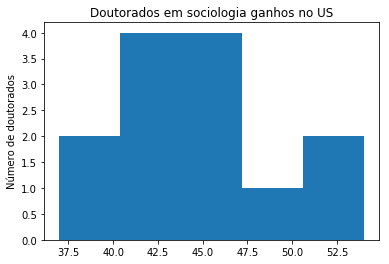

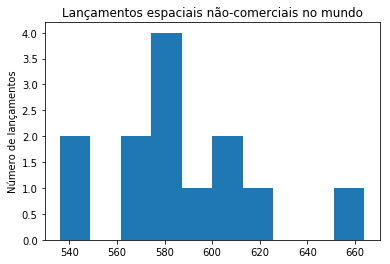

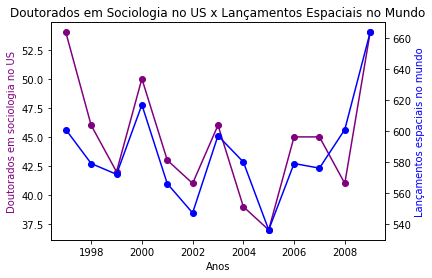

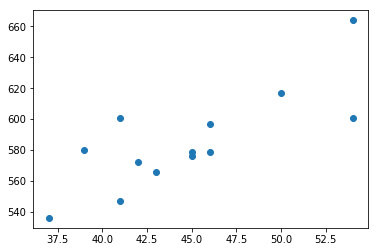

Covariância entre os datasets: 134.1282051282051
Correlação de Pearson entre os datasets: 0.8549120660558475


In [3]:
# YOUR CODE HERE
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/sociology_doctorates_awarded_vs_woldwide_noncommercial_space_launches.csv')
X = df.values

year = [x[0] for x in X]
sociologyDoctorates = [x[1] for x in X]
spaceLaunches = [x[2] for x in X]

plt.hist(sociologyDoctorates, bins=5)
plt.title('Doutorados em sociologia ganhos no US')
plt.ylabel('Número de doutorados')
plt.show()

plt.hist(spaceLaunches, bins=10)
plt.title('Lançamentos espaciais não-comerciais no mundo')
plt.ylabel('Número de lançamentos')
plt.show()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(year, sociologyDoctorates, color='purple', linestyle='-', marker='o')
ax2.plot(year, spaceLaunches, 'b-', marker='o')

plt.title('Doutorados em Sociologia no US x Lançamentos Espaciais no Mundo')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Doutorados em sociologia no US', color='purple')
ax2.set_ylabel('Lançamentos espaciais no mundo', color='b')

plt.show()

plt.scatter(sociologyDoctorates, spaceLaunches)
plt.show()

def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    #vamos usar o dot implementado do numpy novamente:
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = np.std(x)
    stdev_y = np.std(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # se não há variação, correlação é zero

print('Covariância entre os datasets:', covariance(sociologyDoctorates, spaceLaunches))
print('Correlação de Pearson entre os datasets:', correlation(sociologyDoctorates, spaceLaunches))

Para a quantidade de lançamentos não-comerciais espaciais, creio que uma boa explicação da ocorrência é o avanço gradual da tecnologia. Já para o doutorado, não consegui achar alguma boa explicação.

# Exercício 03:

O Paradoxo de Simpson também pode ser observado na taxa de sobrevivência do [naufrágio do RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic). Havia uma estimativa de 2.224 passageiros e tripulantes a bordo, e mais de 1.500 morreram, tornando-se um dos mais mortais desastres marítimos comerciais em tempos de paz da história moderna. Dados sobre os passageiros podem ser baixados [aqui](https://ww2.amstat.org/publications/jse/v3n3/datasets.dawson.html). Este conjunto de dados foi processado por mim e transformado em um arquivo [csv](https://www.dropbox.com/s/vk8jf0wyczqxkvv/survival_titanic.csv?dl=0), que é muito mais fácil de tratar que um arquivo texto. Informações sobre ele podem ser lidas [aqui](https://www.dropbox.com/s/xpjw74khyqx9ww4/survival_titanic.README.txt?dl=0). 

Embora muitas outras informações existam sobre os passageiros, aqui vamos trabalhar com apenas quatro:

1) Se o passageiro sobreviveu;  
2) A classe do seu bilhete (primeira, segunda ou terceira) ou se ele era membro da tripulação;  
3) O sexo do passageiro;  
4) E se ele era um adulto ou uma criança.  

Os dados estão organizados da seguinte maneira:

|Coluna|Descrição|Valores|
| :-: | :-: | :-: |
|0|Classe| 0 = tripulação, 1 = primeira, 2 = segunda, 3 = terceira|
|1|Idade|1 = adulto, 0 = criança|
|2|Sexo|1 = masculino, 0 = feminino|
|3|Sobreviveu?|1 = sim, 0 = não|


O seguinte trecho de código carrega os dados que serão usados para responder as questões a seguir:


In [6]:
import pandas as pd
df = pd.read_csv('data/survival_titanic.csv')
X = df.values

__a)__ Verifique qual classe possui uma taxa de sobrevivência maior, para isso, implemente uma função _survivalRatePerClass(X, classe)_ com esse mesmo nome e parêmetros que, dado a tabela X e um número (0,1,2,3) representando a classe, retorna a proporção de pessoas daquela classe que sobreviveram com uma precisão de 5 casas decimais. 

__Dica:__  
a função _round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

In [7]:
# YOUR CODE HERE

def survivalRatePerClass(X, classe):
    X_C = [p for p in X if p[0] == classe]
    rate = sum(p[3] for p in X_C)/len(X_C)
    return round(rate, 5)

In [8]:
from nose.tools import assert_equal

assert_equal(survivalRatePerClass(X, 0), 0.23955)

__b)__ Verifique qual classe possui uma taxa de sobrevivência maior de acordo com a idade e sexo dos passageiros. Para isso, implemente uma função _survivalRatePerClassAndColumn(X, classe, coluna)_ com esse mesmo nome e parêmetros que, dado a tabela X, um número (0,1,2,3) representando a classe e um número (1,2) representando respectivamente as colunas que representam a idade e o sexo dos passageiros, retorna a proporção de pessoas daquela classe que sobreviveram com uma precisão de 5 casas decimais. Nesse caso, retorne uma tupla do tipo (<proporção de sobreviventes crianças da classe>, <proporção de sobreviventes adultos da classe>) quando a coluna for a 1 e (<proporção de sobreviventes mulheres da classe>, <proporção de sobreviventes homens da classe>)  quando a coluna for a 2.

__Dica:__  
a função _round(var, n)_ retorna o valor da variável var com uma precisão de n casas decimais.

In [9]:
# YOUR CODE HERE
def survivalRatePerClassAndColumn(X, classe, coluna):
    X_C0 = [p for p in X if p[0] == classe and p[coluna]==0]
    X_C1 = [p for p in X if p[0] == classe and p[coluna]==1]
    sur_0, sur_1 = (None,None)
    rSur_0, rSur_1 = (None, None)
    if(X_C0):
        sur_0 = sum(p[3] for p in X_C0)/len(X_C0)
        rSur_0 = round(sur_0, 5)
    if(X_C1):
        sur_1 = sum(p[3] for p in X_C1)/len(X_C1)
        rSur_1 = round(sur_1, 5)
        
    return rSur_0, rSur_1

In [10]:
from nose.tools import assert_equal

#classe 0 (criança, adulto)
assert_equal(survivalRatePerClassAndColumn(X, 0, 1), (None, 0.23955))
#classe 1 (criança, adulto)
assert_equal(survivalRatePerClassAndColumn(X, 1, 1), (1.0, 0.61755))
#classe 0 (mulher, homem)
assert_equal(survivalRatePerClassAndColumn(X, 0, 2), (0.86957, 0.22274))

__c)__ Após brincar com as funções criadas, faça uma breve análise sobre os resultados encontrados, relacionando-os ao Paradoxo de Simpson visto em sala de aula.

Os resultados encontrados nos mostram que só verificar um tipo de estatística nos dados não é o suficiente. O Paradoxo de Simpson fica explicitado quando olhamos apenas para a função survivalRatePerClass(), que averigua a sobrevivência por classe, mas sem olhar a porcentagem de sobrevivência dentre grupos menores, como homens, mulheres e crianças (que é feita olhando as colunas separadamente), e sem considerar a proporção destes grupos por entre as classes.